In [14]:
# Based on MAC0417/5768 Visão e Processamento de Imagens
# from Prof. Dr. Paulo A. V. de Miranda

# Plot inline
%matplotlib inline
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import scipy

def to_255_image(image):
    Imax = image.max()
    image = np.floor(255*(image/float(Imax)))
    image = image.astype(np.uint8)
    return image

class Spectrum:
    def __init__(self, spectrum):
        self.spectrum = spectrum
    def visualization_mode(self):
        return to_255_image(20*np.log(1+np.abs(self.spectrum)))
    def get_image(self):
        spectrum_shift_back = np.fft.ifftshift(self.spectrum)
        img_back = np.fft.ifft2(spectrum_shift_back)
        return img_back
    # Statics
    @staticmethod
    def to_fourier_spectrum(image):
        f_image = np.fft.fft2(image)
        shift = np.fft.fftshift(f_image)
        return Spectrum(shift)
    

def threshold_image(image, level):
    Imax = image.max()
    limit = level*float(Imax)
    image = np.where(image >limit, 1, 0)
    return image
    
def get_window_statistics(image, kernel_size, i, j):
    half = int(kernel_size)/2
    start_i = i - half
    start_j = j - half
    end_i = i + half + 1
    end_j = j + half + 1
    
    sum = 0.0
    max = 0
    count = kernel_size*kernel_size - 1
    
    for border_i in range(start_i, end_i):
        for border_j in range(start_j, end_j):
            if border_i == i and border_j == j:
                continue
            current_value = image[border_i,border_j]
            sum += current_value
            if np.abs(current_value) > max:
                max = np.abs(current_value)

    return (sum/count, max)
        
    
def noise_filtered_image(image, kernel_size, multiply_factor):
    if kernel_size % 2 == 0:
        raise "kernel_size should be odd"
    real_image = np.copy(image.real)
    
    start_i = kernel_size/2
    start_j = kernel_size/2
    end_i = real_image.shape[0] - start_i
    end_j = real_image.shape[1] - start_j
    
    centers = []
    centers.append((real_image.shape[0] / 2, real_image.shape[1] / 2))
    centers.append((real_image.shape[0] / 2 + 1, real_image.shape[1] / 2))
    centers.append((real_image.shape[0] / 2, real_image.shape[1] / 2 + 1))
    centers.append((real_image.shape[0] / 2 + 1, real_image.shape[1] / 2 + 1))
    
    selected = []
    
    for i in range(start_i, end_i):
        for j in range(start_j, end_j):
            if (i,j) in centers:
                continue
            center_value = np.abs(real_image[i,j])
            window_average, max = get_window_statistics(real_image, kernel_size, i, j)
            
            if center_value > max*multiply_factor:
                selected.append((i,j,center_value,window_average))
                real_image[i,j] = window_average
    return (real_image) + image.imag * 1j

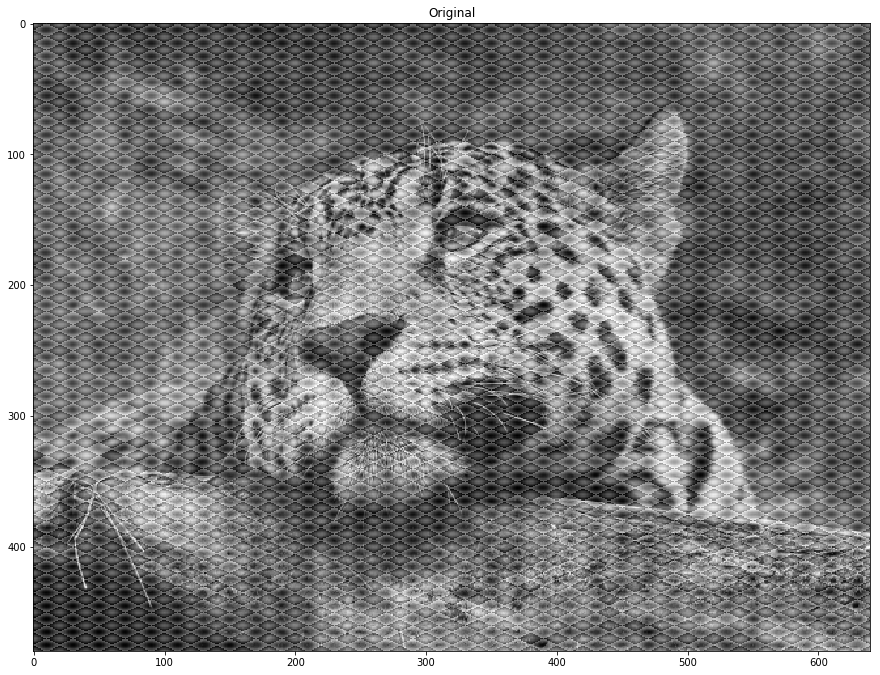

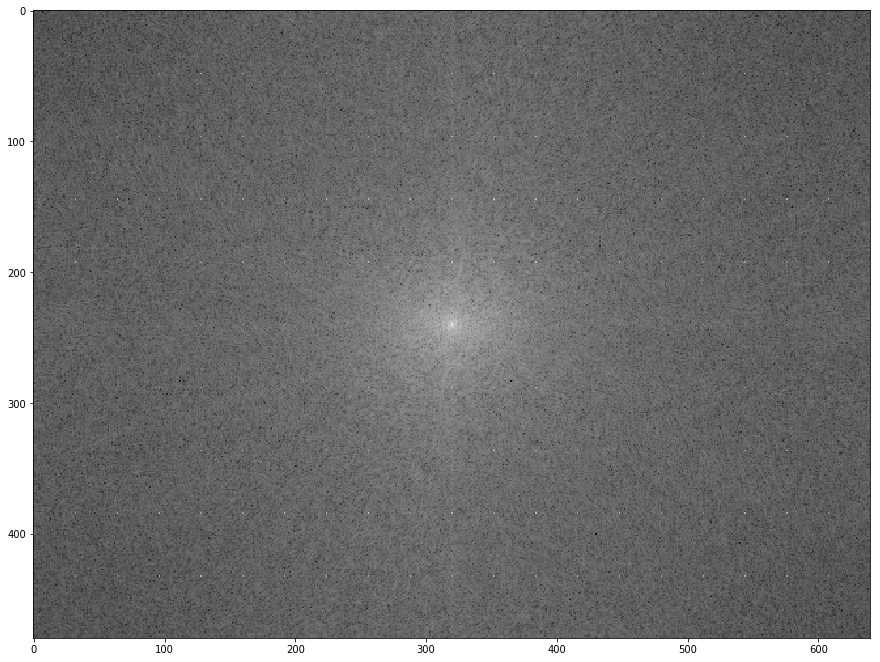

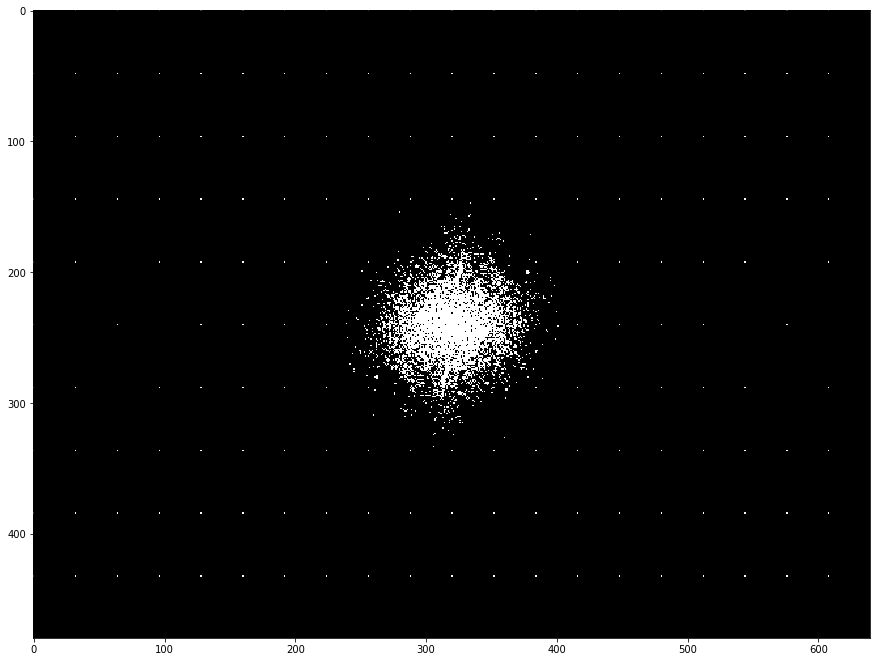

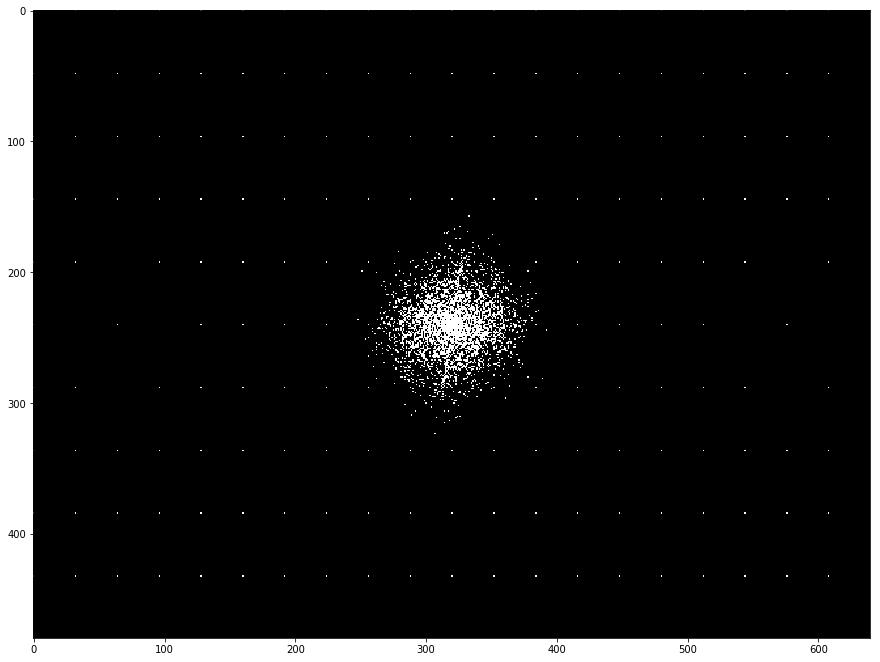

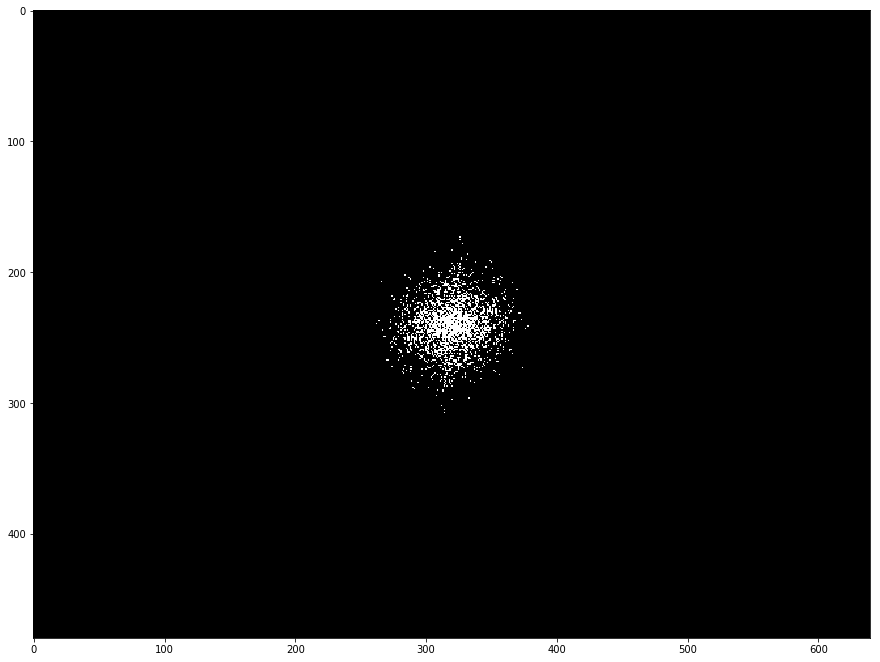

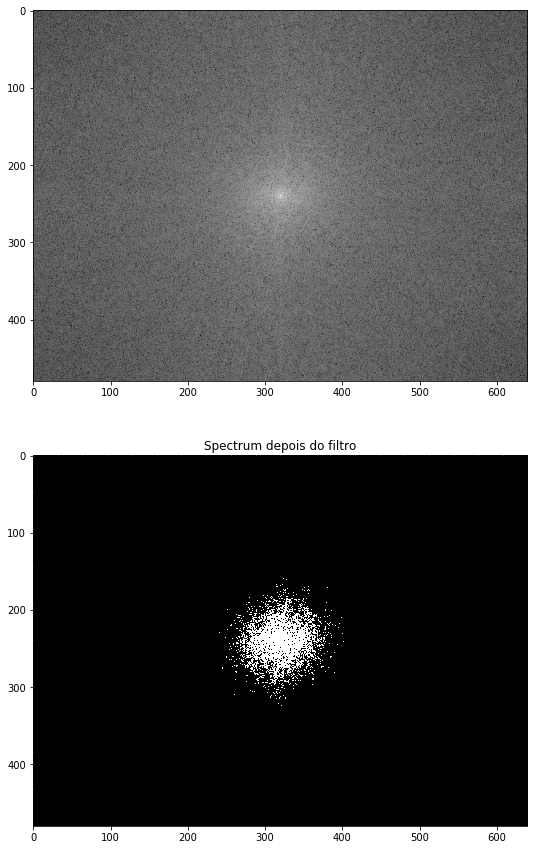

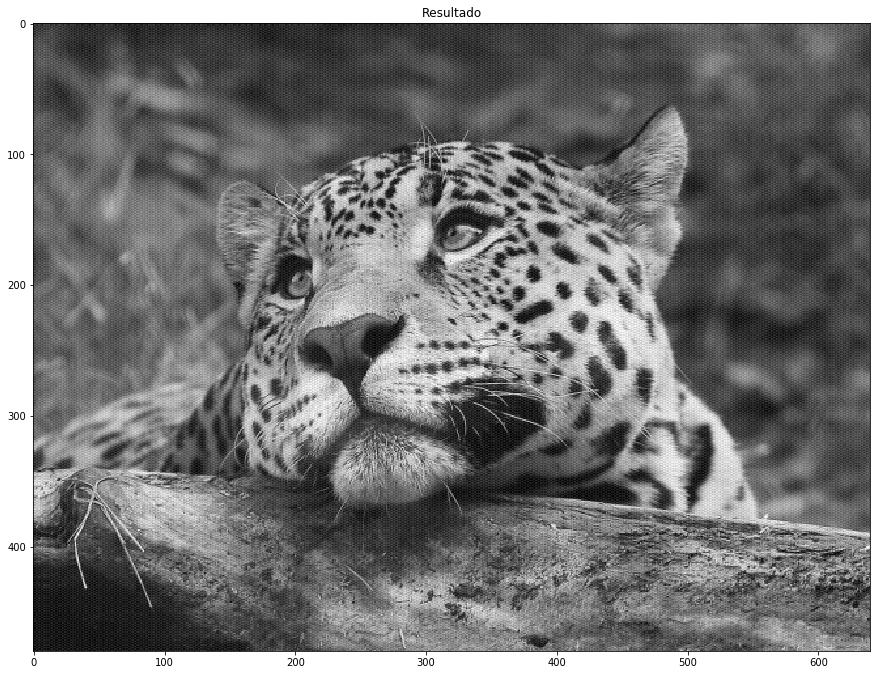

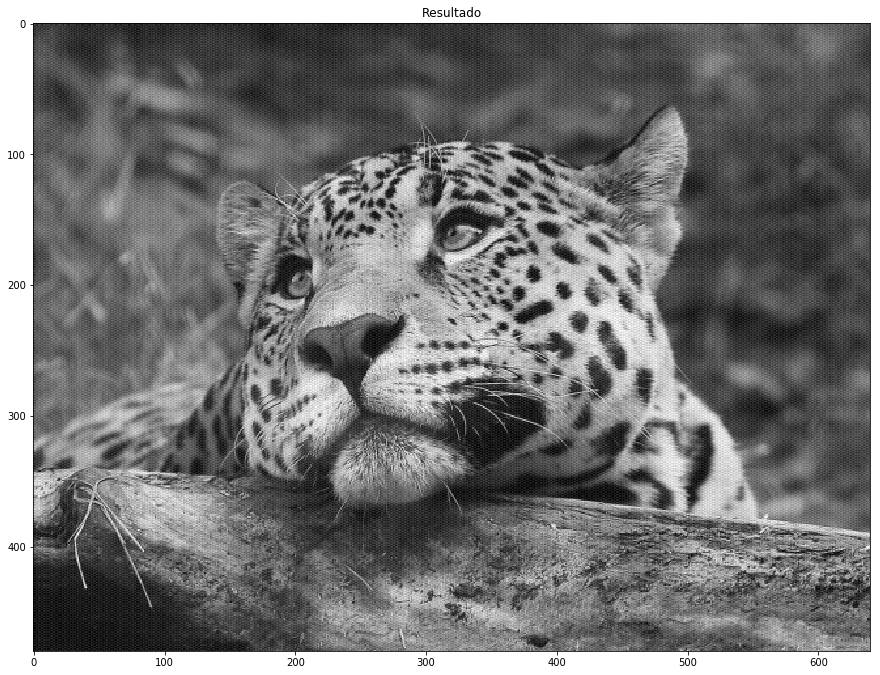

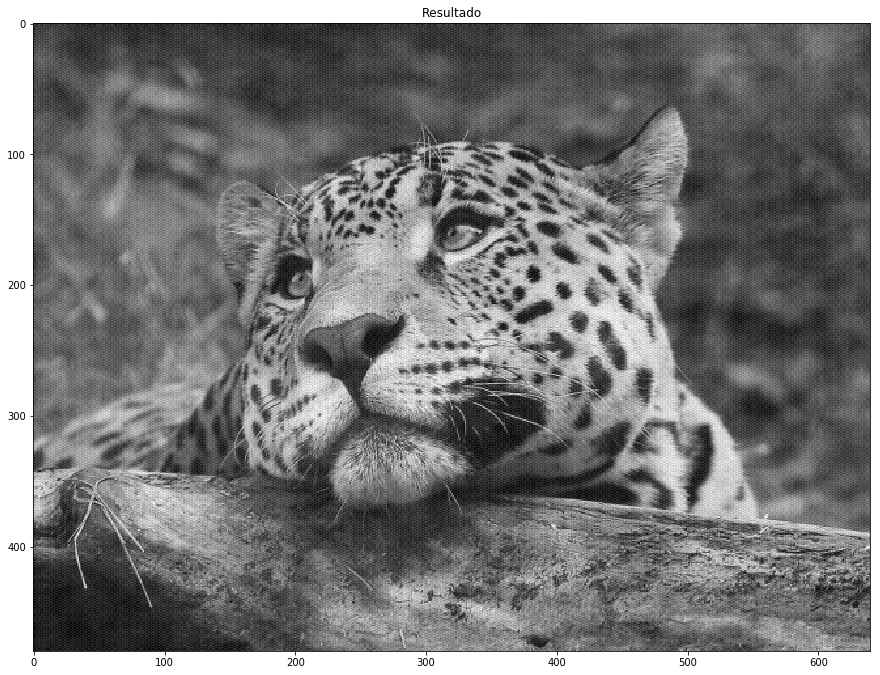

In [15]:

original_img = cv2.imread('../EP2/leopard_noise.png', cv2.IMREAD_GRAYSCALE)
original_img = original_img.astype(np.float64)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(original_img, cmap='gray')
plt.title('Original')
plt.show()

spectrum = Spectrum.to_fourier_spectrum(original_img)

spectrum_original = spectrum.visualization_mode()
threshold_spectrum = threshold_image(spectrum_original, 0.60)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(spectrum_original, cmap='gray')
plt.show()

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(threshold_spectrum, cmap='gray')
plt.show()

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(threshold_image(to_255_image(20*np.log(1+np.abs(spectrum.spectrum.real))), 0.60), cmap='gray')
plt.show()


fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(threshold_image(to_255_image(20*np.log(1+np.abs(spectrum.spectrum.imag))), 0.75), cmap='gray')
plt.show()



filtered_spectrum = Spectrum(noise_filtered_image(spectrum.spectrum, 5, 2))

visual_filtered_spectrum = filtered_spectrum.visualization_mode()
threshold_filtered_spectrum  = threshold_image(visual_filtered_spectrum, 0.60)

fig, imgs = plt.subplots(2,1, figsize=(15,15))
imgs[0].imshow(visual_filtered_spectrum, cmap='gray')
imgs[1].imshow(threshold_filtered_spectrum, cmap='gray')
plt.title('Spectrum depois do filtro')
plt.show()

image_back = filtered_spectrum.get_image()
image_back = image_back.real.astype(np.float64)
                                    
fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(image_back, cmap='gray')
plt.title('Resultado')
plt.show()


filtered_spectrum = Spectrum(noise_filtered_image(spectrum.spectrum, 5, 5))
image_back = filtered_spectrum.get_image()
image_back = image_back.real.astype(np.float64)
                                    
fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(image_back, cmap='gray')
plt.title('Resultado')
plt.show()


filtered_spectrum = Spectrum(noise_filtered_image(spectrum.spectrum, 3, 1.8))
image_back = filtered_spectrum.get_image()
image_back = image_back.real.astype(np.float64)
                                    
fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(image_back, cmap='gray')
plt.title('Resultado')
plt.show()

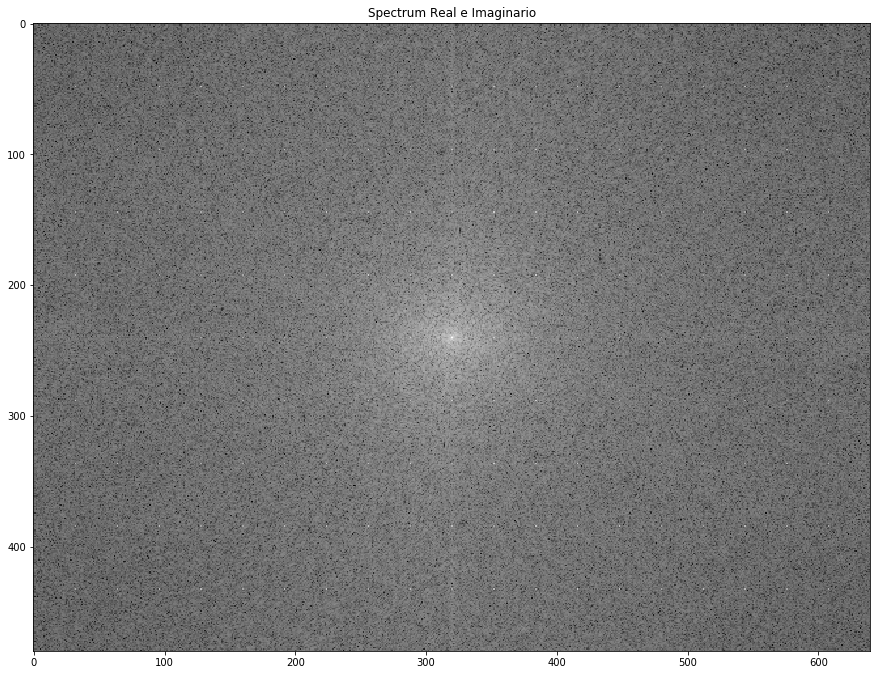

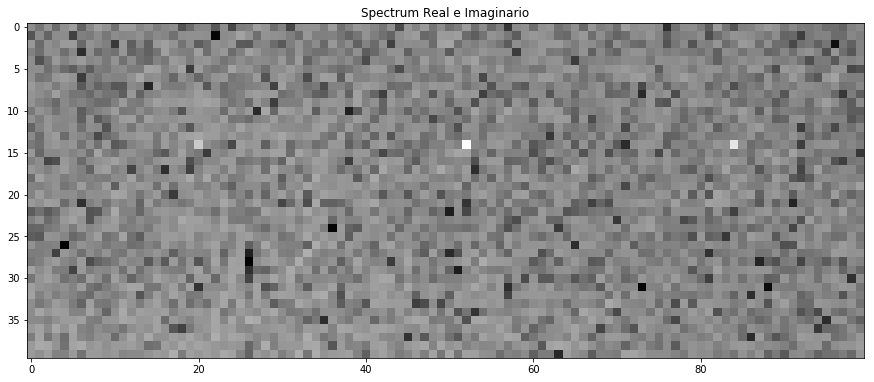

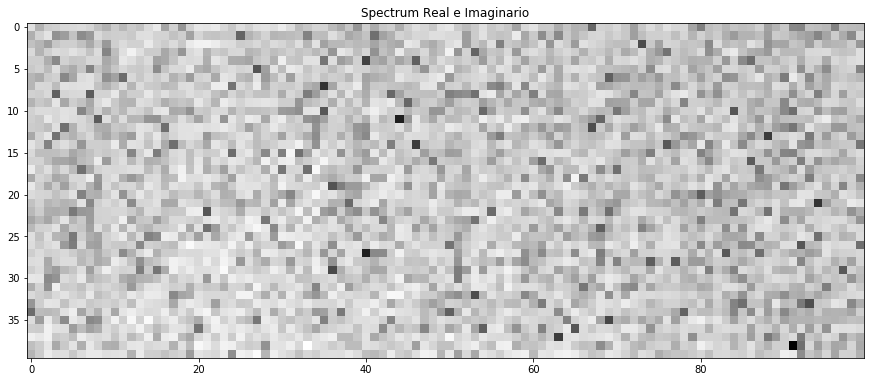

TypeError: noise_filtered_image() takes exactly 3 arguments (2 given)

In [3]:

original_img = cv2.imread('../EP2/leopard_noise.png', cv2.IMREAD_GRAYSCALE)
original_img = original_img.astype(np.float64)

spectrum = Spectrum.to_fourier_spectrum(original_img)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(to_255_image(20*np.log(1+np.abs(spectrum.spectrum.real))), cmap='gray')
plt.title('Spectrum Real e Imaginario')
plt.show()

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(to_255_image(20*np.log(1+np.abs(spectrum.spectrum.real)))[130:170,300:400], cmap='gray')
plt.title('Spectrum Real e Imaginario')
plt.show()

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(to_255_image(20*np.log(1+np.abs(spectrum.spectrum.imag)))[130:170,300:400], cmap='gray')
plt.title('Spectrum Real e Imaginario')
plt.show()

filtered = noise_filtered_image(spectrum.spectrum.real[130:170,300:400] + spectrum.spectrum.imag[130:170,300:400]*1j, 9)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(filtered.real, cmap='gray')
plt.title('Filtered')
plt.show()

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(to_255_image(20*np.log(1+np.abs(filtered))), cmap='gray')
plt.title('Filtered')
plt.show()

In [ ]:

original_img = cv2.imread('../EP2/leopard_noise.png', cv2.IMREAD_GRAYSCALE)
original_img = original_img.astype(np.float64)

spectrum = Spectrum.to_fourier_spectrum(original_img)


fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(to_255_image(20*np.log(1+np.abs(spectrum.spectrum.real)))[140:150,315:326], cmap='gray')
plt.title('Spectrum Real e Imaginario')
plt.show()

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(to_255_image(20*np.log(1+np.abs(spectrum.spectrum.imag)))[140:150,315:325], cmap='gray')
plt.title('Spectrum Real e Imaginario')
plt.show()

filtered = noise_filtered_image(spectrum.spectrum.real[140:150,315:325] + spectrum.spectrum.imag[140:150,315:325]*1j, 9)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(filtered.real, cmap='gray')
plt.title('Filtered')
plt.show()


fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(to_255_image(20*np.log(1+np.abs(filtered))), cmap='gray')
plt.title('Filtered')
plt.show()